In [85]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('before_hotencoding2.csv')
dff=pd.read_csv('week9.csv')
#display(df.columns)
#df.describe()
# check the corr with the variables ['age','duration','pdays','campaign','previous']:
#df.corr()


### Personal info: age, job, marital, education , job_missing, education_missing
### + 
### Account & loans info: balance, overdraft, default , housing, loan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45206 entries, 0 to 45205
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45206 non-null  int64  
 1   age_grp    45206 non-null  int64  
 2   job        45206 non-null  float64
 3   education  45206 non-null  int64  
 4   balance    45206 non-null  int64  
 5   overdraft  45206 non-null  float64
 6   default    45206 non-null  int64  
 7   housing    45206 non-null  int64  
 8   loan       45206 non-null  int64  
 9   indebt     45206 non-null  int64  
 10  divorced   45206 non-null  int64  
 11  married    45206 non-null  int64  
 12  single     45206 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 4.5 MB


,age,age_grp,job,education,balance,overdraft,default,housing,loan,indebt,divorced,married,single
age,1.000000,0.464880,0.166497,-0.173684,0.038993,-0.041340,-0.017884,-0.185603,-0.015721,-0.154707,0.164679,0.286204,-0.427774
age_grp,0.464880,1.000000,0.047540,-0.029486,0.018170,-0.023612,-0.005778,-0.072824,-0.022857,-0.069882,0.067647,0.154265,-0.215605
job,0.166497,0.047540,1.000000,0.163606,0.023830,-0.071075,-0.022786,-0.231738,-0.069949,-0.221705,0.026519,-0.109153,0.099832
education,-0.173684,-0.029486,0.163606,1.000000,0.026645,-0.038113,-0.009029,-0.038689,0.004261,-0.029074,0.005881,-0.126261,0.133054
balance,0.038993,0.018170,0.023830,0.026645,1.000000,-0.017726,-0.007968,-0.031068,-0.018557,-0.035921,0.003343,0.004039,-0.006759
overdraft,-0.041340,-0.023612,-0.071075,-0.038113,-0.017726,1.000000,0.223864,0.103856,0.132402,0.200311,0.035660,-0.010610,-0.013745
default,-0.017884,-0.005778,-0.022786,-0.009029,-0.007968,0.223864,1.000000,-0.006030,0.077254,0.244151,0.017772,-0.014461,0.003119
housing,-0.185603,-0.072824,-0.231738,-0.038689,-0.031068,0.103856,-0.006030,1.000000,0.041207,0.787944,0.001766,0.017701,-0.020489
loan,-0.015721,-0.022857,-0.069949,0.004261,-0.018557,0.132402,0.077254,0.041207,1.000000,0.612782,0.016405,0.036937,-0.051771
indebt,-0.154707,-0.069882,-0.221705,-0.029074,-0.035921,0.200311,0.244151,0.787944,0.612782,1.000000,0.014272,0.031474,-0.044323


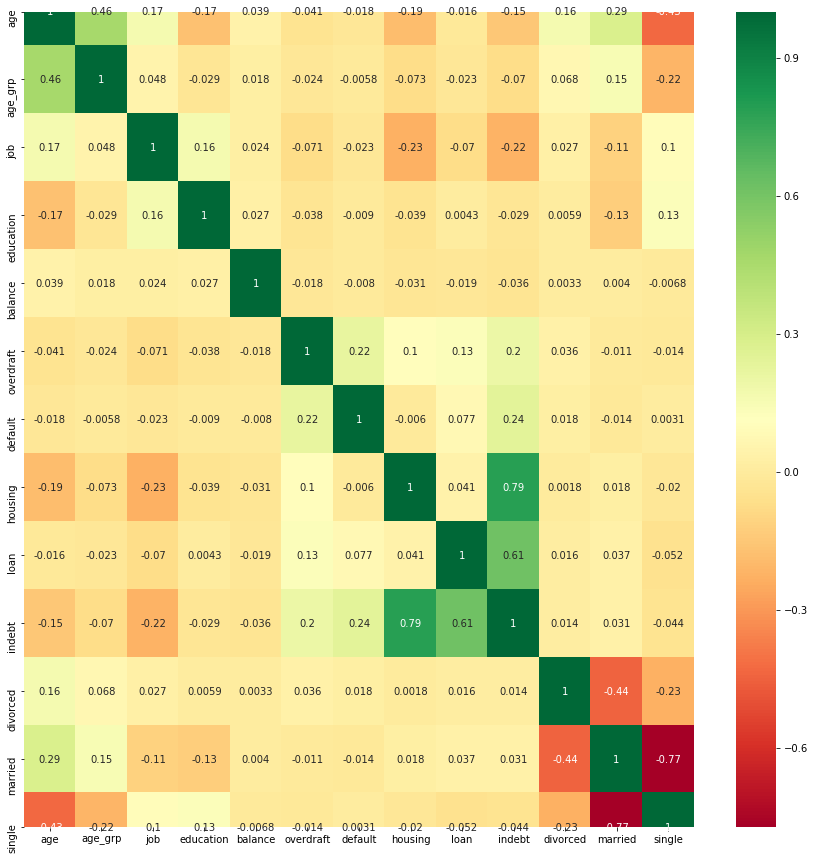

In [86]:
### Personal standing financially: 


personal_info=['age','job','education','balance','overdraft','default', 'housing', 'loan','divorced','married','single']#,'y_equiv']

#########################################################################
indebt=df['default']+df['housing']+df['loan']
df['indebt']=indebt
personal_info.append('indebt')
######################################################################3
df.loc[df['age']>65,'age_grp']='old'
df.loc[df['age']<=25,'age_grp']='young'
df.loc[(df['age']<=65) & (df['age']>25),'age_grp']='adult'

orig_age_grp=df['age_grp']

ordinal_age_grp=df.age_grp.unique().tolist()
ordinal_age_grp_encoded=[1,0,2]
#display(ordinal_age_grp)
 
ind=0
for e in ordinal_age_grp:
    df.loc[df['age_grp']==e,'age_grp']=int(ordinal_age_grp_encoded[ind])
    ind=ind+1
df['age_grp']=df['age_grp'].astype('int64')

personal_info.append('age_grp')

personal_info=['age','age_grp','job','education','balance','overdraft','default', 'housing', 'loan','indebt','divorced','married','single']#,'y_equiv']
df[personal_info].info()

#print(df.columns)

corrmat = df[personal_info].corr(method='pearson')
display(corrmat)
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[personal_info][top_corr_features].corr(),annot=True,cmap="RdYlGn")

#display(df[personal_info].corr())
# print('#####################################/nspearman')
# display(df[personal_info].corr(method='spearman',numeric_only=False))


In [87]:

educ_transform=pd.read_csv('education_list.csv')

##hypothesis 1
df.groupby(['age_grp'])[['age','overdraft']].sum()

##hypothesis 2
df.groupby(['indebt','age_grp'])[['housing']].count()*100/df.groupby(['age_grp'])[['housing']].count()

##hypothesis 3
df.groupby(['education','balance'])['age'].count()*100/df.groupby(['balance'])['age'].count()
df.groupby(['age_grp','balance'])['age'].count()*100/df.groupby(['balance'])['age'].count()

##hypothesis 4
hyp_4=df.query('age_grp==2').groupby(['job']).count()[['age']]*100/len(df.query('age_grp==2'))
edu=pd.merge(left=hyp_4, right=educ_transform, left_on='job', right_on='genre_encoded_dumb')[['age','category','genre_encoded_dumb']]

#hypothesis 5
df.groupby(['overdraft','default'])['age'].count()
#display(df[personal_info].corr().default.overdraft)

#hypothesis 6
df.groupby(['indebt','default'])['age'].count()

##hypothesis 7
hyp7=df.groupby(['job'])['age'].min()
pd.merge(left=hyp7, right=educ_transform, left_on='job', right_on='genre_encoded_dumb')[['age','category','genre_encoded_dumb']]
df.groupby(['married']).min().age

##hypothesis 8 new
df.groupby(['balance','default'])['age'].count()*100/df.groupby(['default'])['age'].count()

##hypothesis 9
hyp9=df.query('age<21').groupby(['job','housing'])['age'].count()*100/df.query('age<21').groupby(['job'])['age'].count()
#display(hyp9)
tmps=df.query('age<21').groupby(['job'])['age'].count()*100/df.query('age<21').housing.count()
pd.merge(left=tmps, right=educ_transform, left_on='job', right_on='genre_encoded_dumb')[['category','genre_encoded_dumb']]

hyp10=df.groupby(['job','education'])['age'].count()*100/df.groupby(['job'])['age'].count()
#display(hyp10)
#pd.merge(left=hyp7, right=educ_transform, left_on='job', right_on='genre_encoded_dumb')[['category','genre_encoded_dumb']]


### This campaign & costumer info: campaign, contact, day, day_of_week, month, year, duration, contact_missing


,campaign,contact,contact_missing,day,month,year,duration
campaign,1.000000,-0.032263,0.004845,0.162528,0.054904,-0.166210,-0.084606
contact,-0.032263,1.000000,-0.862391,0.020170,0.153606,0.364329,0.025518
contact_missing,0.004845,-0.862391,1.000000,-0.034091,-0.182433,-0.428380,-0.014356
day,0.162528,0.020170,-0.034091,1.000000,0.101981,-0.170305,-0.030126
month,0.054904,0.153606,-0.182433,0.101981,1.000000,-0.373885,-0.011892
year,-0.166210,0.364329,-0.428380,-0.170305,-0.373885,1.000000,0.037028
duration,-0.084606,0.025518,-0.014356,-0.030126,-0.011892,0.037028,1.000000


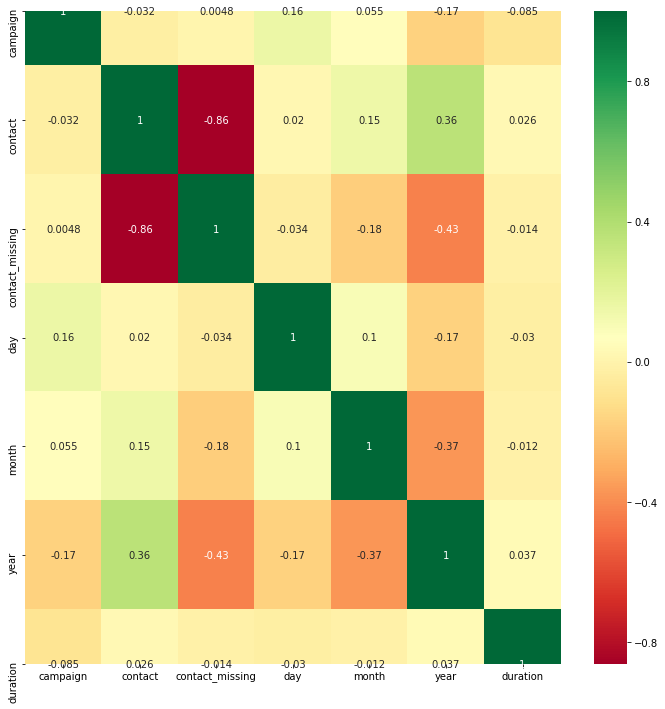

In [88]:
### Personal standing financially: 

this_campaign_info=['campaign','contact','contact_missing','day','day_of_week','month','year', 'duration']

# from sklearn.preprocessing import LabelEncoder
# #monday:1
# for col in ["day_of_week"]:
#     a=LabelEncoder().fit(df[col])
#     print(df[col].unique(),list(a.classes_))
#     df[col]=a.transform(df[col])

mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,

}

df['day_of_week'] = df['day_of_week'].replace(mapping)
df
#df[this_campaign_info].info()


corrmat = df[this_campaign_info].corr(method='pearson')
display(corrmat)
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(df[this_campaign_info][top_corr_features].corr(),annot=True,cmap="RdYlGn")



durations statistics
upper limit=1269.0
max=4918
len(> upper_lim)=452



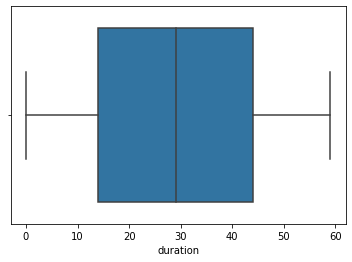

In [89]:
#sns.boxplot(df['duration'])
df.duration.describe()
for col in ['duration']:
    #outliers['col']=col
    upper_lim = df[col].quantile(.99)
    print('{}''s statistics\nupper limit={}\nmax={}\nlen(> upper_lim)={}\n'.format(col,upper_lim,df[col].max(),len(df[df['duration']>upper_lim])))

df['duration']=df['duration']%60
sns.boxplot(df['duration'])


In [90]:
corrmat = df[this_campaign_info].corr(method='pearson')
display(corrmat)

df['duration']
bins_it=(df.duration.max()-df.duration.min())/5
bins=[]#[df.balance.min()]
for i in range(1,5):
    bins.append(bins_it*i+1)

bins.append(df.duration.max())
#bins=[bins_middle,df.balance.max()]
print('equally spaced bins would look like this',bins)

df.duration.describe()

,campaign,contact,contact_missing,day,month,year,duration
campaign,1.000000,-0.032263,0.004845,0.162528,0.054904,-0.166210,-0.036824
contact,-0.032263,1.000000,-0.862391,0.020170,0.153606,0.364329,0.008876
contact_missing,0.004845,-0.862391,1.000000,-0.034091,-0.182433,-0.428380,-0.011434
day,0.162528,0.020170,-0.034091,1.000000,0.101981,-0.170305,-0.011322
month,0.054904,0.153606,-0.182433,0.101981,1.000000,-0.373885,-0.002608
year,-0.166210,0.364329,-0.428380,-0.170305,-0.373885,1.000000,-0.000782
duration,-0.036824,0.008876,-0.011434,-0.011322,-0.002608,-0.000782,1.000000


equally spaced bins would look like this [12.8, 24.6, 36.400000000000006, 48.2, 59]


count    45206.000000
mean        29.120272
std         17.230182
min          0.000000
25%         14.000000
50%         29.000000
75%         44.000000
max         59.000000
Name: duration, dtype: float64

,yes,no
sat,3,27
sun,4,16
mon,968,8554
fri,988,7719
tue,1018,7246
wed,1086,7828
thu,1220,8529


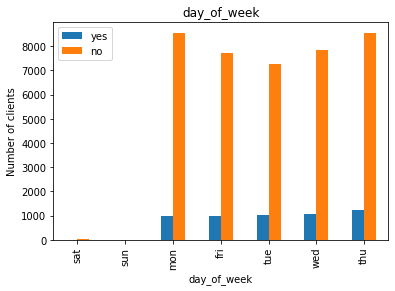

,yes,no
12,100,114
1,142,1261
3,248,229
9,269,310
10,322,413
11,403,3567
2,441,2208
6,546,4794
4,577,2355
7,627,6268


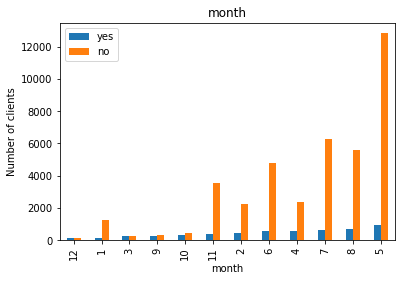

In [91]:
rec_cond= (df['year']==2008 ) | ((df['year']==2009) & (df['month']<6))
no_rec_cond= (df['year']==2010 ) | ((df['year']==2009) & (df['month']>=6))
df.groupby(['year'])['age'].count()

df.loc[rec_cond,'rec']=1
df.loc[no_rec_cond,'rec']=0
this_campaign_info.append('rec')

df.rec=df.rec.astype('int32')
#df.rec.head()
a=df.groupby(['rec'])['duration'].agg(pd.Series.mode)
b=df.groupby(['rec'])['campaign'].mean()
ab=pd.merge(left=a, right=b, left_on=['rec'], right_on=['rec'])

a=df.groupby(['year'])['duration'].agg(pd.Series.mode)
b=df.groupby(['year'])['campaign'].mean()
ab=pd.merge(left=a, right=b, left_on=['year'], right_on=['year'])
ab

cats=['day_of_week','month']
ind=0
for c in cats:
    #c=cats[0]
    #cunique=df[c].unique()
    values=pd.DataFrame()
    values['yes']=df[df['y']=='yes'][c].value_counts().sort_values()
    values['no']=df[df['y']=='no'][c].value_counts().sort_values()
    display(values)
    values.plot(kind='bar')
    plt.xlabel(f'{c}')
    plt.ylabel('Number of clients')
    plt.title('{}'.format(c))
    plt.show();

### Previous contact info: pdays, previous,poutcome, poutcome_missing

In [92]:
# df.columns
previous_contact=['pdays', 'previous','poutcome','poutcome_missing']


corrmat = df[previous_contact].corr(method='pearson')
#display(corrmat)
top_corr_features = corrmat.index
plt.figure()
#g=sns.heatmap(df[previous_contact][top_corr_features].corr(),annot=True,cmap="RdYlGn")

df.pdays.describe()
df.previous.describe()

for col in ['pdays','previous']:
    #outliers['col']=col
    upper_lim = df[col].quantile(.99)
    print('{}''s statistics\nvar={}\nupper limit={}\nmax={}\nlen(> upper_lim)={}\n'.format(col,df[col].var(),upper_lim,df[col].max(),len(df[df['duration']>upper_lim])))
    

print('# of entries where pdays>0={}\n# of entries where pdays<=0={}'.format(len(df.query("pdays>0")), len(df.query("pdays==0"))))#.groupby('y_equiv').count()
print('\n# of entries where previous>0={}\n# of entries where previous<=0={}'.format(len(df.query("previous>0")), len(df.query("previous==0"))))#.groupby('y_equiv').count()

df.loc[df['pdays']>0,'pdays']=1
df.loc[df['pdays']==0,'pdays']=0

df.loc[df['previous']>0,'previous']=1
df.loc[df['previous']==0,'previous']=0

corrmat = df[previous_contact].corr(method='pearson')
display(corrmat)



pdayss statistics
var=9950.403591113367
upper limit=370.0
max=871
len(> upper_lim)=0

previouss statistics
var=5.3049905628589675
upper limit=8.94999999999709
max=275
len(> upper_lim)=38387

# of entries where pdays>0=8252
# of entries where pdays<=0=36954

# of entries where previous>0=8252
# of entries where previous<=0=36954


,pdays,previous,poutcome,poutcome_missing
pdays,1.000000,1.000000,0.393521,0.435898
previous,1.000000,1.000000,0.393521,0.435898
poutcome,0.393521,0.393521,1.000000,-0.038305
poutcome_missing,0.435898,0.435898,-0.038305,1.000000


<Figure size 432x288 with 0 Axes>

### Economic and social indicators: euribor3m, consum_prices_rate, consum_conf_ind, employed, unemployed, unemployed_rate

,euribor3m,consum_prices_rate,consum_conf_ind,employed,unemployed,unemployed_rate
euribor3m,1.000000,0.840559,-0.235024,0.892567,-0.891437,-0.892365
consum_prices_rate,0.840559,1.000000,-0.191668,0.874238,-0.840861,-0.846292
consum_conf_ind,-0.235024,-0.191668,1.000000,-0.123357,0.144201,0.142187
employed,0.892567,0.874238,-0.123357,1.000000,-0.993290,-0.994663
unemployed,-0.891437,-0.840861,0.144201,-0.993290,1.000000,0.999864
unemployed_rate,-0.892365,-0.846292,0.142187,-0.994663,0.999864,1.000000


,euribor3m,consum_prices_rate,consum_conf_ind,employed,unemployed,unemployed_rate
count,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000
mean,3.338543,1.544423,-27.428310,4761.878434,542.185705,10.596775
std,1.817397,1.801286,3.910569,80.917277,70.226653,1.378856
min,0.000000,-1.800000,-38.800000,4630.400000,486.800000,9.500000
25%,1.327000,-0.100000,-29.600000,4663.000000,486.800000,9.500000
50%,4.855000,2.800000,-28.100000,4817.200000,490.100000,9.600000
75%,4.961000,3.100000,-24.400000,4827.700000,617.800000,12.100000
max,5.045000,3.400000,-14.400000,4827.700000,678.400000,13.200000


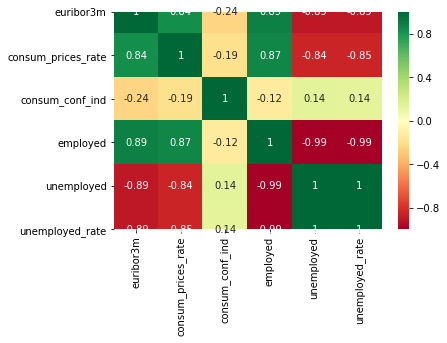

In [93]:
df.columns
eco_indic=['euribor3m','consum_prices_rate', 'consum_conf_ind', 'employed', 'unemployed','unemployed_rate']

corrmat = df[eco_indic].corr(method='pearson')
display(corrmat)
top_corr_features = corrmat.index
plt.figure()
g=sns.heatmap(df[eco_indic][top_corr_features].corr(),annot=True,cmap="RdYlGn")
df[eco_indic].describe()


In [94]:
#removing unnecessary columns  
df.columns
dff.drop(['age','employed','unemployed','pdays'],axis=1,inplace=True)

In [95]:
#merge findings of EDA (dF) with feature engineering (dff)
# pd.merge(left=dff, right=df, left_on='job', right_on='genre_encoded_dumb')[['age','category','genre_encoded_dumb']]
df.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'year', 'day_of_week', 'euribor3m',
       'consum_prices_rate', 'consum_conf_ind', 'employed', 'unemployed',
       'unemployed_rate', 'y_equiv', 'contact_missing', 'poutcome_missing',
       'job_missing', 'education_missing', 'overdraft', 'divorced', 'married',
       'single', 'indebt', 'age_grp', 'rec'],
      dtype='object')

In [96]:
dff['age_grp']=df['age_grp'] 
dff['rec']=df['rec']
dff['indebt']=df['indebt']
dff['balance']=df['balance']
dff['previous']=df['previous']
dff['duration']=df['duration']

dff.describe()

,job,education,default,balance,housing,loan,contact,day,duration,campaign,...,month6,month7,month8,month9,month10,month11,month12,age_grp,rec,indebt
count,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,...,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000
mean,0.117442,2.060479,0.018029,0.004977,0.555855,0.160200,0.647702,15.806220,29.120272,2.763881,...,0.118126,0.152524,0.138167,0.012808,0.016259,0.087820,0.004734,0.987059,0.879352,0.734084
std,0.043060,0.778722,0.133056,0.084645,0.496876,0.366795,0.477692,8.322483,17.230182,3.098164,...,0.322761,0.359532,0.345080,0.112447,0.126471,0.283036,0.068641,0.214476,0.325721,0.648762
min,0.073350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.083756,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,14.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.111989,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,16.000000,29.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.137059,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,21.000000,44.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.275204,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,31.000000,59.000000,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


In [97]:
dff.columns
dff.to_csv("week10_EDA.csv",
          index=False,
          encoding="utf-8")

In [98]:

# import scipy.stats as ss
# import numpy as np
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# cats=dfpre.select_dtypes(include=['O']).columns
# features=cats[cats!= 'y']
# print('\nchi correlation between y and categoric values')
# for f in features:
#     print('corr bet y and {} = {:.2f}'.format(f,cramers_v(dfpre[f],dfpre.y)))

    
# ints=df.select_dtypes(exclude=['O']).columns
# print('\ncorrelation between numeric values and y')
# corr_mat=df.corr()
# #display(df.corr().iloc[:,-1]) ##display(np.corrcoef(df[ints].T))
# corr_mat

# # df.default=df.default.astype('int32')

# df.pdays.describe() #find outliers and deal with them, if little remove them altogether 

# for col in ['age','duration','pdays','campaign','previous']:
#     upper_lim = df[col].quantile(.95)
#     lower_lim = df[col].quantile(.05)
#     print('{}\nmin,lower,upper,max,len(> upper_lim])\n{} {} {} {} {} '.format(col,df[col].min(),lower_lim,upper_lim,df[col].max(),len(df[df[col] > upper_lim])))
#     #print(max(df[df[col]<upper_lim][col]))
# #data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
# #duration,campaign,pdays,previous,age

In [99]:
# import sklearn.feature_selection

# sklearn.feature_selection.mutual_info_classif(df.balance, df.y)


# from sklearn.metrics import mutual_info_score

# def calc_MI(x, y, bins):
#     c_xy = np.histogram2d(x, y, bins)[0]
#     mi = mutual_info_score(None, None, contingency=c_xy)
#     return mi

# calc_MI(df.age,df.balance,100)

# df.groupby(['job','marital']).first()

# ct_table_ind=pd.crosstab(df["marital"],df["poutcome"])
# ct_table_ind#.query('poutcome=="unknown"')
# #print('contingency_table :\n',ct_table_ind)

# #df.groupby('poutcome').mean()
# #df.loc(df=='unknown').any()
# df[((df['job']=='unknown')  | (df['education']=='unknown')) & (df['contact']=='unknown') | ((df['job']=='unknown')  & (df['education']=='unknown'))]
# #conds